In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Housing.csv')

In [ ]:
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [ ]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
# Convert categorical columns to category type if necessary
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Verify data types
print(df.dtypes)

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object


In [ ]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataframe
print(df_encoded.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows of the scaled dataframe
print(df_encoded.head())

      price      area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  13300000  1.046726  1.403419   1.421812  1.378217  1.517692          True   
1  12250000  1.757010  1.403419   5.405809  2.532024  2.679409          True   
2  12250000  2.218232  0.047278   1.421812  0.224410  1.517692          True   
3  12215000  1.083624  1.403419   1.421812  0.224410  2.679409          True   
4  11410000  1.046726  1.403419  -0.570187  0.224410  1.517692          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingst

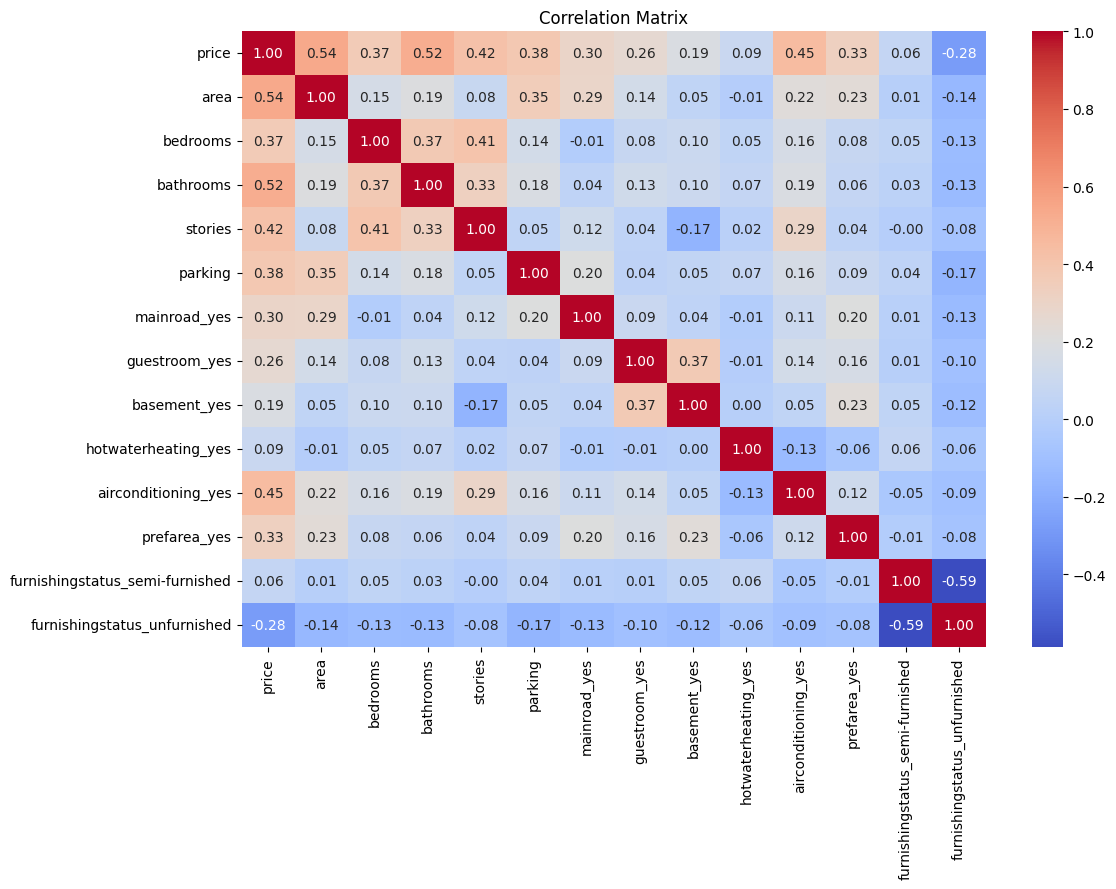

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

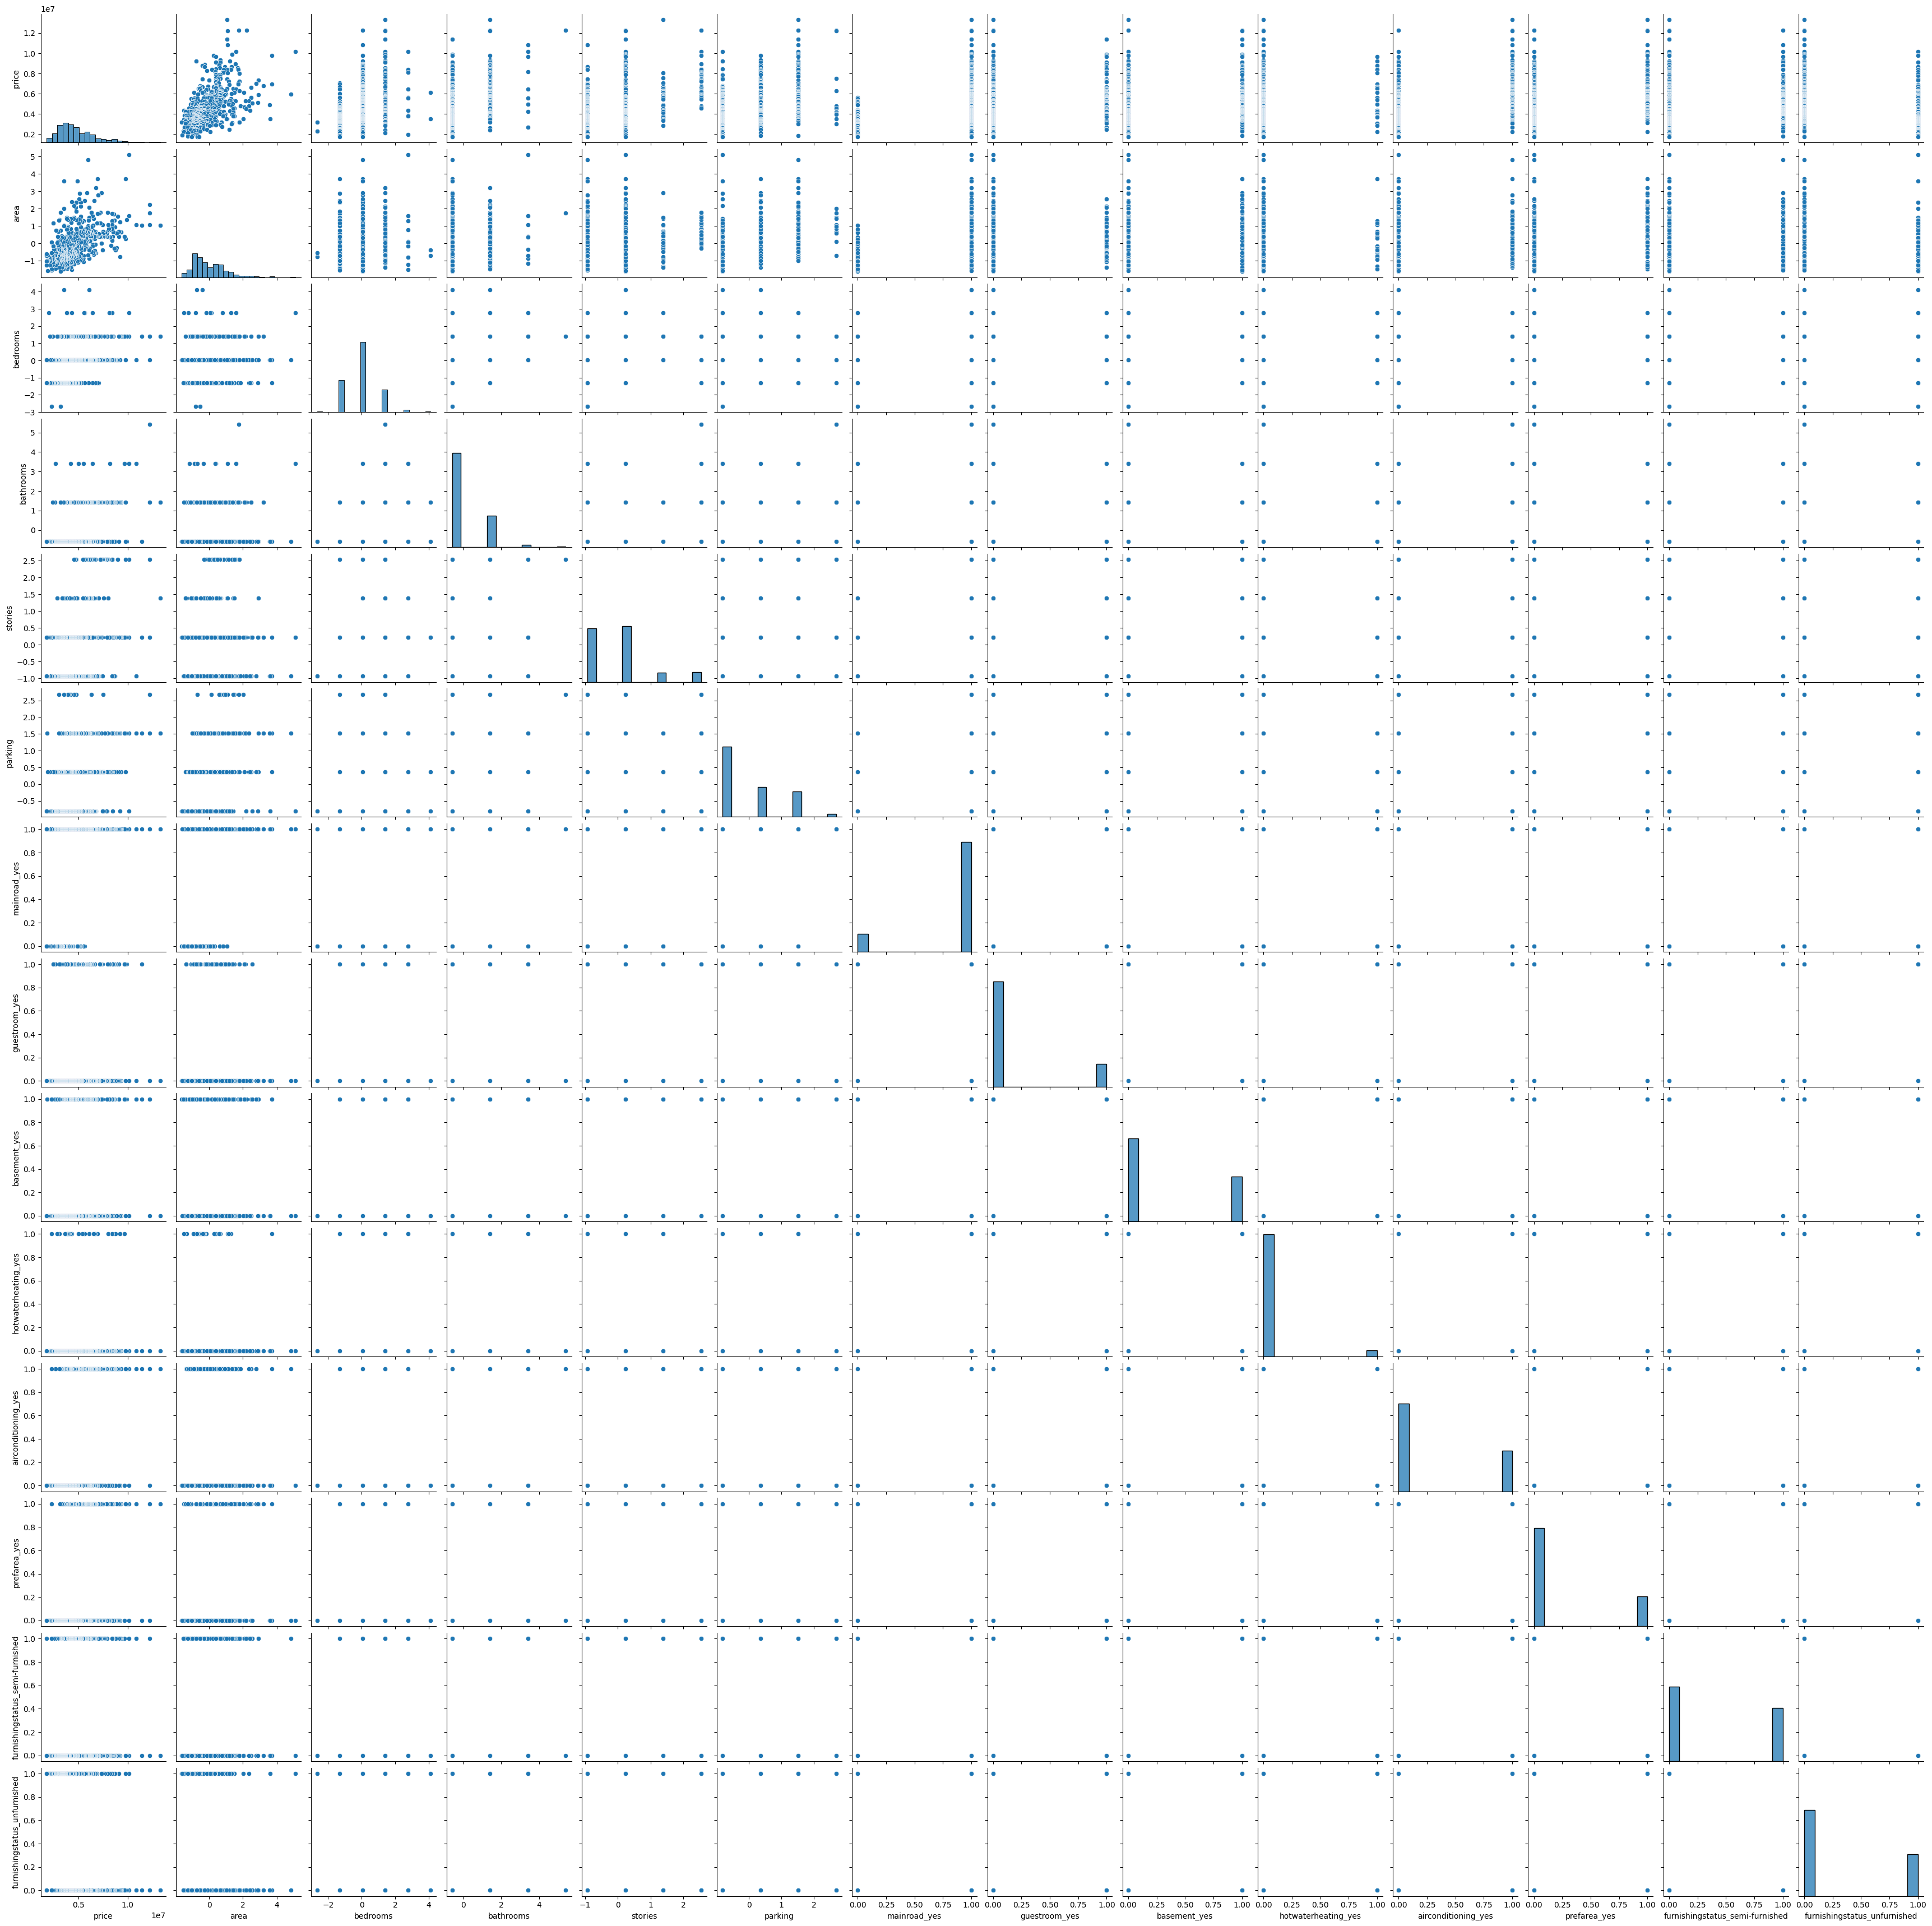

In [ ]:
# Pair plot to visualize relationships between features
sns.pairplot(df_encoded)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

MAE: 970043.4039201644
MSE: 1754318687330.6685
RMSE: 1324506.9600914405
R^2: 0.6529242642153175


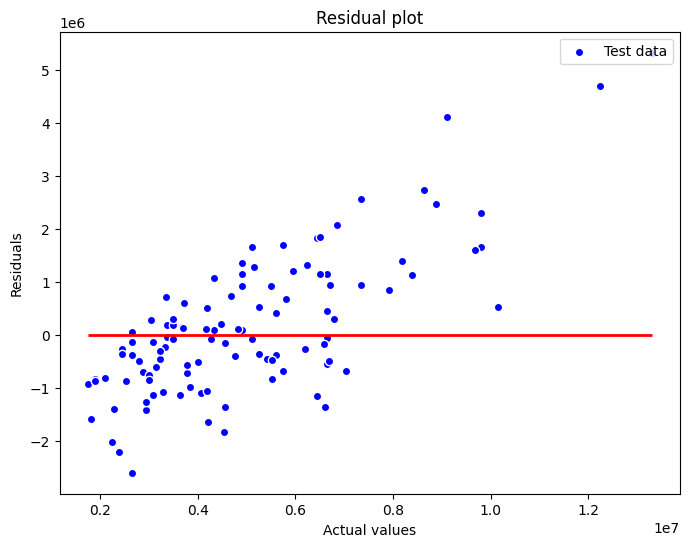

In [ ]:
# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - y_pred, c='blue', marker='o', edgecolor='white', label='Test data')
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.title('Residual plot')
plt.show()